<a href="https://colab.research.google.com/github/aakhterov/ML_algorithms_from_scratch/blob/master/Decision_Tree_(select_a_feature_to_split).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Callable
from itertools import chain

In [76]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

[Text(0.5, 0, 'Fraction of Class k ($p_k$)'),
 Text(0, 0.5, 'Entropy measure'),
 Text(0.5, 1.0, 'Entropy')]

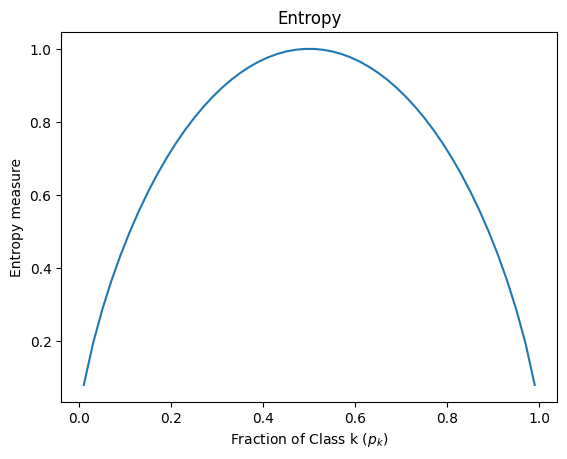

In [2]:
# Let's look at Entropy plot
x = np.linspace(0.01,0.99)
y = -x*np.log2(x) - (1-x)*np.log2(1-x)
g = sns.lineplot(x=x, y=y)
g.set(xlabel="Fraction of Class k ($p_k$)", ylabel="Entropy measure", title="Entropy")

[Text(0.5, 0, 'Fraction of Class k ($p_k$)'),
 Text(0, 0.5, 'Impurity Measure'),
 Text(0.5, 1.0, 'Gini Impurity')]

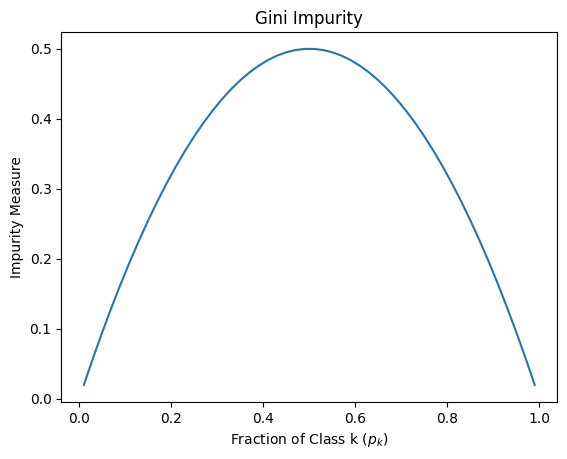

In [3]:
# Let's look at Gini Impurity plot
x = np.linspace(0.01,0.99)
y = 1 - (x*x) - (1-x)*(1-x)
g = sns.lineplot(x=x, y=y)
g.set(xlabel="Fraction of Class k ($p_k$)", ylabel="Impurity Measure", title="Gini Impurity")

In [75]:
# Calculate Entropy
def entropy(probabilities):
  probs = np.array(probabilities)
  return np.abs(-np.sum(probs*np.log2(probs+1e-100)))

In [68]:
# Calculate Gini impurity
def gini(probabilities):
  probs = np.array(probabilities)
  return 1 - np.sum(probs**2)

In [94]:
# Calculate Information Gain
def inf_gain(current_value: float,
             target_distribition: List[List],
             based_on_func: Callable=entropy,
             verbose: bool=False):

  total_samples = np.sum(list(chain.from_iterable(target_distribition)))
  after_value = 0
  for i, value in enumerate(target_distribition):
    probabilities = value/np.sum(value)
    f = based_on_func(probabilities)
    if verbose:
      print(f"{based_on_func.__name__} for feature value #{(i+1)}: {f:.3f}. Total samples with this value: {np.sum(value)}")
    after_value +=np.sum(value)*f/total_samples

  return current_value-after_value

In [7]:
# Make some tests

In [8]:
# Imagine we take some feature with the following distribution of the target variable
# Within the 1th value of selecting feature: [3, 4]
# Within the 2th value of selecting feature: [6, 1]
# Total samples: 14
# We will leverage Entropy
# E_1 = -(3/7) * log2(3/7) - (4/7) * log2(4/7) = 0.985
# E_2 = -(6/7) * log2(6/7) - (1/7) * log2(1/7) = 0.592
# E_prev = 0.94
# Information Gain = 0.94 - ( (7/14) * E_1 + (7/14) * E_2 ) = 0.152

inf_gain(current_value=0.94,
         target_distribition=[[3, 4], [6, 1]],
         based_on_func=entropy,
         verbose=True)

entropy for feature value #1: 0.985. Total samples with this value: 7
entropy for feature value #2: 0.592. Total samples with this value: 7


0.1515495426917104

In [9]:
# Calculate Information Gain in respect that there are three values of selecting attribute
inf_gain(current_value=0.94,
         target_distribition=[[2, 3], [4, 0], [3, 2]],
         based_on_func=entropy,
         verbose=True)

entropy for feature value #1: 0.971. Total samples with this value: 5
entropy for feature value #2: 0.000. Total samples with this value: 4
entropy for feature value #3: 0.971. Total samples with this value: 5


0.24646386110380802

In [10]:
# use gini impurity
inf_gain(current_value=0.94,
         target_distribition=[[2, 3], [4, 0], [3, 2]],
         based_on_func=gini,
         verbose=True)

gini for feature value #1: 0.480. Total samples with this value: 5
gini for feature value #2: 0.000. Total samples with this value: 4
gini for feature value #3: 0.480. Total samples with this value: 5


0.5971428571428571

In [11]:
# Let's take a toy example

In [12]:
# Defining a simple dataset
attribute_names =  ['age', 'income','student', 'credit_rate']
class_name = 'default'
data1 ={
    'age' : ['youth', 'youth', 'middle_age', 'senior', 'senior', 'senior','middle_age', 'youth', 'youth', 'senior', 'youth', 'middle_age','middle_age', 'senior'],
    'income' : ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium','low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student' : ['no','no','no','no','yes','yes','yes','no','yes','yes','yes','no','yes','no'],
    'credit_rate' : ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair','excellent', 'excellent', 'fair', 'excellent'],
    'default' : ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes','yes', 'yes', 'yes', 'no']
}
df1 = pd.DataFrame (data1, columns=data1.keys())
print(df1)

           age  income student credit_rate default
0        youth    high      no        fair      no
1        youth    high      no   excellent      no
2   middle_age    high      no        fair     yes
3       senior  medium      no        fair     yes
4       senior     low     yes        fair     yes
5       senior     low     yes   excellent      no
6   middle_age     low     yes   excellent     yes
7        youth  medium      no        fair      no
8        youth     low     yes        fair     yes
9       senior  medium     yes        fair     yes
10       youth  medium     yes   excellent     yes
11  middle_age  medium      no   excellent     yes
12  middle_age    high     yes        fair     yes
13      senior  medium      no   excellent      no


In [13]:
# At first, we'll leverage Entropy to measure splitting quality

In [15]:
# STEP 1 Calculate total Entropy
probabilities = df1.default.value_counts().values/df1.default.value_counts().sum() # destribution of classes of the target variable on the entire dataset
print(probabilities)
root_value = entropy(probabilities)
print('Dataset entropy:', root_value)

[0.64285714 0.35714286]
Dataset entropy: 0.9402859586706311


In [102]:
# Step 2. Iterate over all features, calculate inforamtion gain for every features,
# select feature with the higest inforamtion gain (or with minimal entropy)

information_gain = []
for feature in df1.loc[:, df1.columns!='default'].columns:
  target_distribution = []
  for value in df1[feature].unique():
    distribution = list(df1[df1[feature] == value]['default'].value_counts().values)
    target_distribution.append(distribution)
  ig = inf_gain(current_value=root_value,
                target_distribition=target_distribution,
                based_on_func=entropy)
  information_gain.append((ig, feature))
print(f"Information gain by features: {information_gain}")
print(f"The best feature for slitting: ", sorted(information_gain, reverse=True)[0][1])

Information gain by features: [(0.24674981977443922, 'age'), (0.02922256565895487, 'income'), (0.15183550136234159, 'student'), (0.04812703040826949, 'credit_rate')]
The best feature for slitting:  age


In [ ]:
# Let's make the same, by using gini impurity

In [103]:
root_value = gini(probabilities)
print('Dataset gini:', root_value)

Dataset gini: 0.4591836734693877


In [104]:
gini_gain = []
for feature in df1.loc[:, df1.columns!='default'].columns:
  target_distribution = []
  for value in df1[feature].unique():
    distribution = list(df1[df1[feature] == value]['default'].value_counts().values)
    target_distribution.append(distribution)
  ig = inf_gain(current_value=root_value,
                target_distribition=target_distribution,
                based_on_func=gini)
  gini_gain.append((ig, feature))
print(f"Gini gain by features: {gini_gain}")
print(f"The best feature for slitting: ", sorted(gini_gain, reverse=True)[0][1])

Gini gain by features: [(0.11632653061224485, 'age'), (0.018707482993197244, 'income'), (0.09183673469387743, 'student'), (0.030612244897959162, 'credit_rate')]
The best feature for slitting:  age


In [ ]:
# Got the same result